In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customers_df = pd.read_csv("../data/olist_customers_dataset.csv")
customers_df.info()
customers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp",
                                                                  "order_approved_at",
                                                                  "order_delivered_carrier_date",
                                                                  "order_delivered_customer_date",
                                                                  "order_estimated_delivery_date"
                                                                 ]).dropna(how="all")
orders_df.info()
orders_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [32]:
#Funkce pro kapitalizaci názvů brazilských měst
def capitalize_city_name(city_name):
    words_not_to_capitalize = {"de", "do", "da"}
    return " ".join(
        word.capitalize() if word not in words_not_to_capitalize else word
        for word in city_name.split()
    )

In [33]:
merged_df = pd.merge(
    orders_df,
    customers_df[["customer_id", "customer_city"]],
    on = "customer_id",
    how= "inner"
)
merged_df["customer_city"] = merged_df["customer_city"].apply(capitalize_city_name)
merged_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Sao Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Vianopolis


In [28]:
#Počet a relativní podíl objednávek podle města (top 10)

counts = merged_df.groupby("customer_city")["order_id"].agg("count").sort_values(ascending=False).head(10)
percentages = (counts / counts.sum() *100).round(2)

top_cities_df = pd.DataFrame(
    data={
        "Count": counts,
        "Percentage": percentages
    })
top_cities_df

,Count,Percentage
customer_city,,
Sao Paulo,15540,44.35
Rio de Janeiro,6882,19.64
Belo Horizonte,2773,7.91
Brasilia,2131,6.08
Curitiba,1521,4.34
Campinas,1444,4.12
Porto Alegre,1379,3.94
Salvador,1245,3.55
Guarulhos,1189,3.39


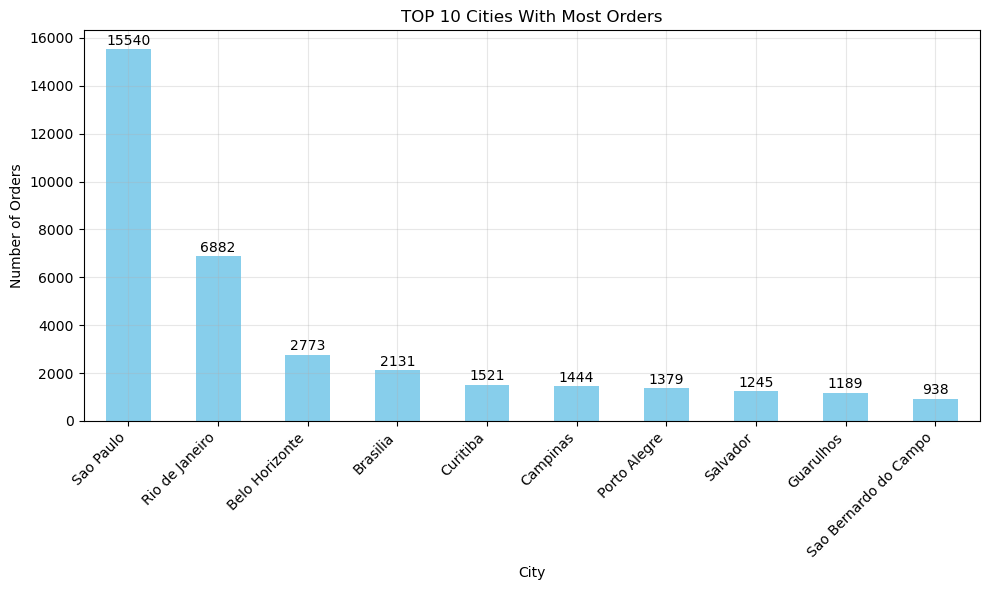

In [29]:
#Vizualizace

top_cities_df["Count"].plot(kind="bar", figsize=(10,6), color="skyblue")
plt.title("TOP 10 Cities With Most Orders")
plt.xlabel("City")
plt.ylabel("Number of Orders")

for i, value in enumerate(counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend().remove()
plt.grid(alpha=0.3)
plt.show()